<a href="https://colab.research.google.com/github/sonu9479/Cardiovascular-risk-prediction-classification-project/blob/main/Cardiovascular_risk_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular risk prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Vivek Singh
**Cohort -** London



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Github link - https://github.com/sonu9479/Cardiovascular-risk-prediction-classification-project

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [156]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [157]:
# Loading Dataset using Github link.
Data_url = 'https://github.com/sonu9479/Cardiovascular-risk-prediction-classification-project/raw/main/data_cardiovascular_risk.csv'
data = pd.read_csv(Data_url, encoding= 'unicode_escape')

### Dataset First View

In [158]:
# Dataset First Look
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [159]:
# Dataset Rows & Columns count:
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 3390 rows and 17 columns


### Dataset Information

In [160]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [161]:
# Dataset Duplicate Value Count
print(f'There are {len(data[data.duplicated()])} duplicate values in dataset.')

# As we can see there are no duplicate values in the Dataset.

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [162]:
# Missing Values/Null Values Count
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

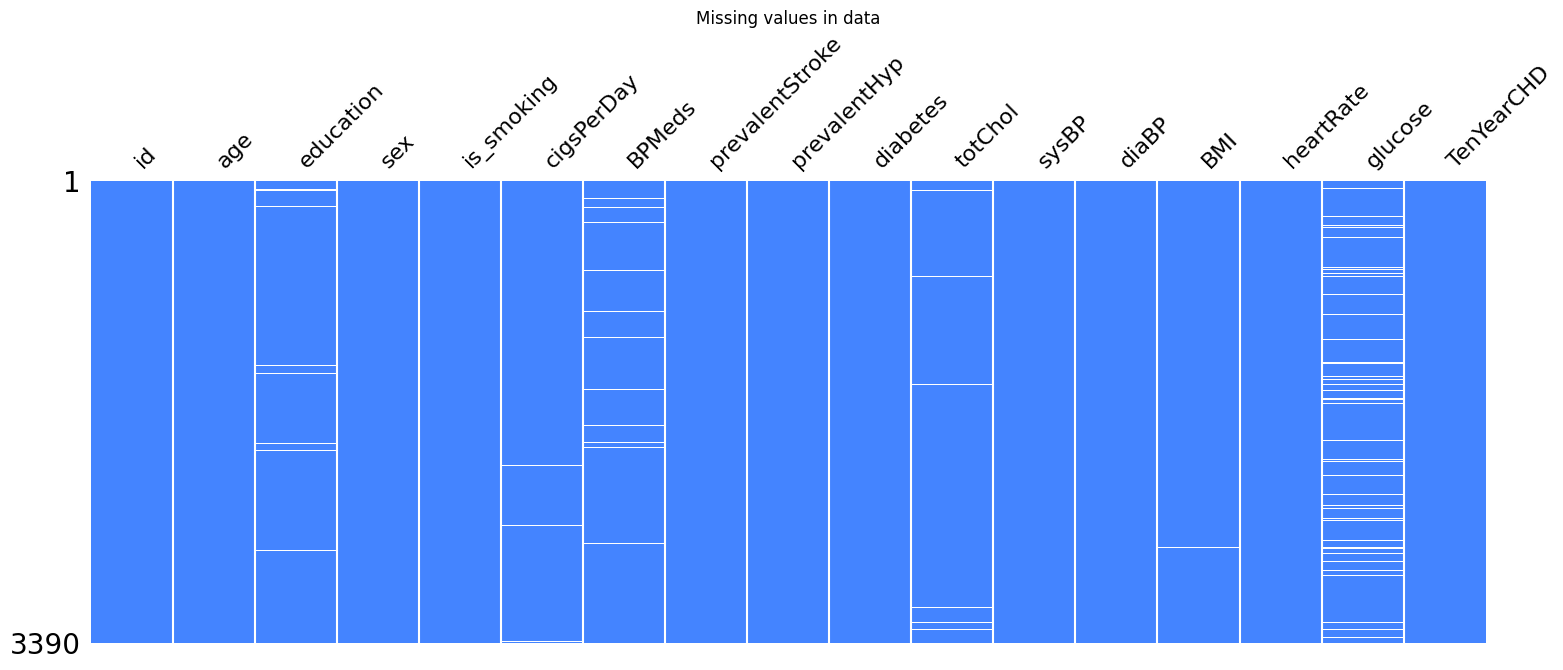

In [163]:
# Visualizing the missing values
import missingno as msno

# Create the missingness matrix
msno.matrix(data, figsize=(18, 6), sparkline=False, color=(0.27, 0.52, 1.0))
plt.title('Missing values in data')
# Display the plot
plt.show()

### What did you know about your dataset?

1)Null values/missing values- 510

2)Dataset has 3390 rows and 17 columns

3)No duplicate Values found in dataset.

4)Columns to convert into numeric(for modelling Purpose)
  
*   sex
*   is_smoking

## ***2. Understanding Your Variables***

In [164]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [165]:
# Dataset Describe
data.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

Answer Here

**'id'**: This column represents an identifier or unique identifier for each individual in the dataset.

**'age'**: It represents the age of the individual in years.

**'education'**: This column represents the education level of the individual, which could be encoded categorically (e.g., high school, college, postgraduate) or numerically (e.g., years of education completed).

**'sex'**: It indicates the biological sex of the individual, typically encoded as binary values (e.g., 0 for female, 1 for male).

**'is_smoking'**: This column indicates whether the individual is currently smoking or not, typically encoded as binary values (e.g., 0 for non-smoker, 1 for smoker).

**'cigsPerDay'**: It represents the number of cigarettes smoked per day by the individual.

**'BPMeds'**: This column indicates whether the individual is taking blood pressure medication, typically encoded as binary values (e.g., 0 for not taking medication, 1 for taking medication).

**'prevalentStroke'**: It indicates whether the individual has a history of stroke, typically encoded as binary values (e.g., 0 for no stroke history, 1 for stroke history).

**'prevalentHyp'**: This column indicates whether the individual has prevalent hypertension (high blood pressure), typically encoded as binary values (e.g., 0 for no hypertension, 1 for hypertension).

**'diabetes'**: It indicates whether the individual has diabetes, typically encoded as binary values (e.g., 0 for no diabetes, 1 for diabetes).

**'totChol'**: This column represents the total cholesterol level of the individual in mg/dL (milligrams per deciliter).

**'sysBP'**: It represents the systolic blood pressure of the individual in mmHg (millimeters of mercury).

**'diaBP'**: This column represents the diastolic blood pressure of the individual in mmHg.

**'BMI'**: It indicates the body mass index of the individual, which is a measure of body fat based on height and weight.

**'heartRate'**: This column represents the resting heart rate of the individual in beats per minute.

**'glucose'**: It represents the blood glucose (sugar) level of the individual in mg/dL.

**'TenYearCHD'**: This column indicates the presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual, typically encoded as binary values (e.g., 0 for no risk, 1 for risk).


### Check Unique Values for each variable.

In [166]:
# Checking Unique Values for each variable
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### 1. Handling Missing Values

In [167]:
# Handling Missing Values & Missing Value Imputation

# Checking null values.
data.isna().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [168]:
# Checking missing value percentage columnwise.

def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


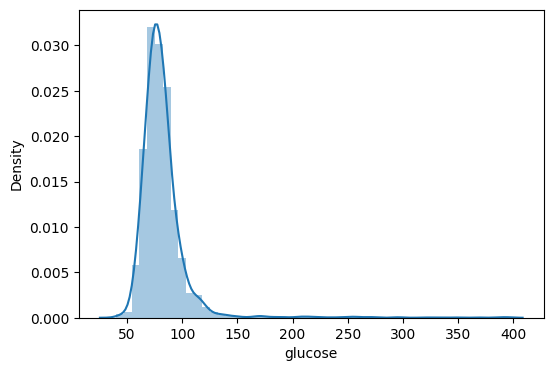

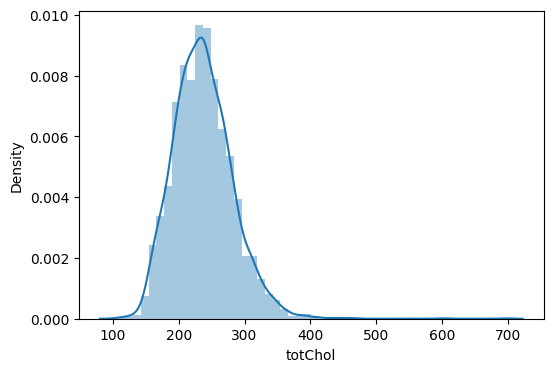

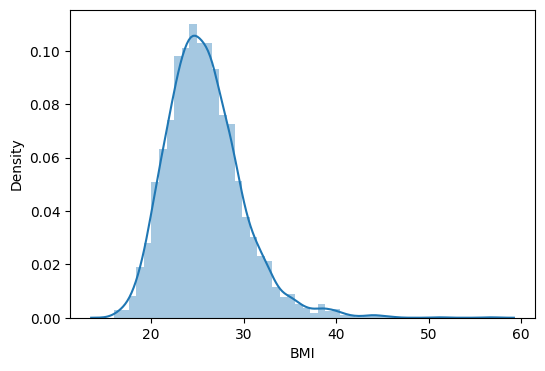

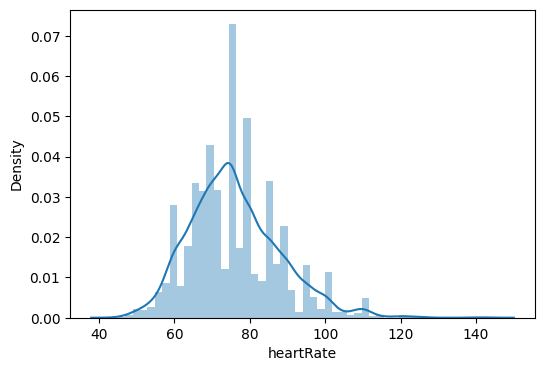

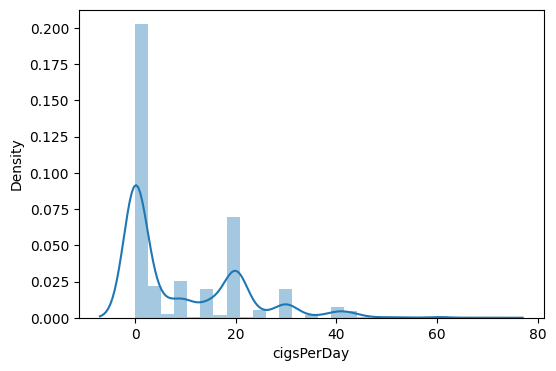

In [169]:
# Visualizing data distribution of the numerical columns which have missing values.

for i in ['glucose','totChol','BMI','heartRate','cigsPerDay']:
  plt.figure(figsize = (6,4))
  sns.distplot(data[i])

In [170]:
# Data is skewed so imputing numerical missing values with median.

data['glucose']= data['glucose'].fillna(data['glucose'].median())

data['totChol']= data['totChol'].fillna(data['totChol'].median())

data['BMI']= data['BMI'].fillna(data['BMI'].median())

data['heartRate']= data['heartRate'].fillna(data['heartRate'].median())

data['cigsPerDay']= data['cigsPerDay'].fillna(data['cigsPerDay'].median())

In [171]:
# Imputing categorical missing data with mode.

data['education']= data['education'].fillna(data['education'].mode()[0])

data['BPMeds']= data['BPMeds'].fillna(data['BPMeds'].mode()[0])


In [172]:
# Checking null values again.

data.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As most of the numerical missing value column data is skewed, so I imputed the missing values with median, and for categorical columns I used mode for imputing missing values.

##*2. Dividing numerical and categorical data*

In [173]:
data.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [174]:
# Dropping 'id' column as it doesn't serve any purpose in dataset.

data = data.drop(columns = 'id')

In [175]:
# finding categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))


There are 2 categorical variables


In [176]:
# finding Numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))


There are 14 numerical variables


In [177]:
# Assigning a variable for discreet features and assigning the features to it which has less than 20 classes.

discreet = []

for var in data.columns:
  if var not in ['TenYearCHD']:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discreet.append(var)
        
print('There are {} discreet variables'.format(len(discreet)))

education  values:  [2. 4. 1. 3.]
sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
There are 7 discreet variables


In [178]:
# Assigning the variable for continuous features.

continuous = [var for var in data.columns if var not in discreet and var not in ['TenYearCHD']]

In [179]:
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### What all manipulations have you done and insights you found?

Answer Here.

1.   From the above analysis I found that the data has some features with missing value, so I imputed the missing values with median and mode features.

2.   Segregated the data into discreet and continuous for better understanding and analysis of independent variables.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Visualizing the dependent variable distribution.

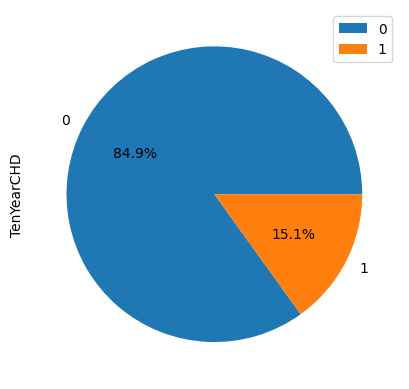

In [180]:
# Chart - 1 visualization of the pie graph.

data['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Used pie graph as I had to show the proportions of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that there is imbalanced distribution of data as 'TenYearCHD' variable has 85% of 0 and 15% of 1 values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Found data imbalance in the data which can affect the efficiency of the models.
Need to use some sampling technique to treat the imbalance.

#### Chart - 2

# Education and Risk of disease.

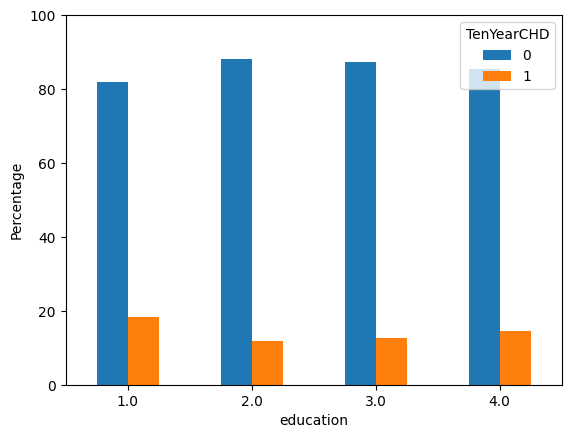

In [181]:
# Chart - 2 visualization of the bar graph for percentage wise distribution.

freq_df = data.groupby('TenYearCHD')['education'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of education level and risk of disease in this graph.

##### 2. What is/are the insight(s) found from the chart?

people with education of 1 year has the highest number of percentage who has risk of CHD. others aren't much behind. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

People with 1 year of education tend to get the CHD more often than others. Surprisingly people with 4 years of education are on the second rank.

#### Chart - 3
#Gender

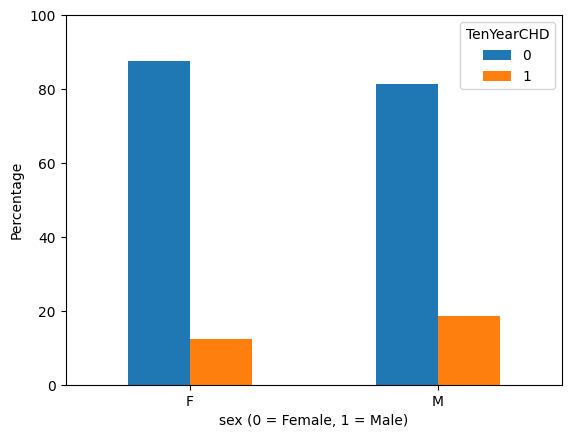

In [182]:
# Chart - 3 visualization of the bar graph for percentage wise distribution.

freq_df = data.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to sex.

##### 2. What is/are the insight(s) found from the chart?

Males have higher percentage of people who has the risk of CHD in the next ten years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
If the insight reveals that males are at a higher risk of CHD, it can lead to positive business opportunities in the healthcare industry.

Negative Business Impact:
If the insight indicates a higher risk of CHD in males, it may have negative implications on certain sectors or businesses. For example:

- Higher healthcare costs associated with treating CHD-related conditions in males.

#### Chart - 4
# Smoking

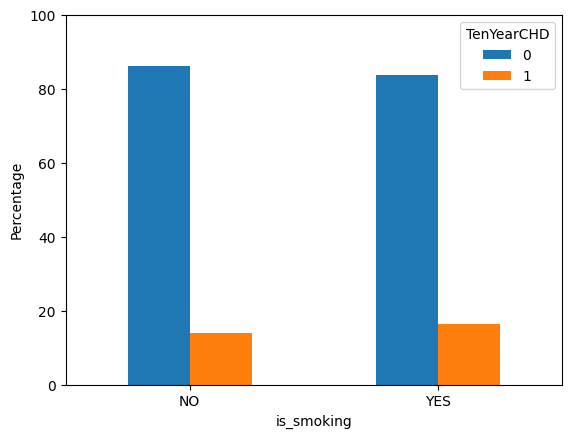

In [183]:
# Chart - 4 visualization of the bar graph for percentage wise distribution.

freq_df = data.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to smoking.

##### 2. What is/are the insight(s) found from the chart?

People who smoke is at high risk of getting CHD than non smokers, but the difference is not significant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
If the insight highlights the increased risk of CHD in smokers, it can create positive business opportunities in the healthcare industry and related sectors. Potential impacts could include:

- Increased demand for smoking cessation programs, products, and services aimed at helping individuals quit smoking and reduce their risk of CHD.

#### Chart - 5
# Blood pressure medicines.

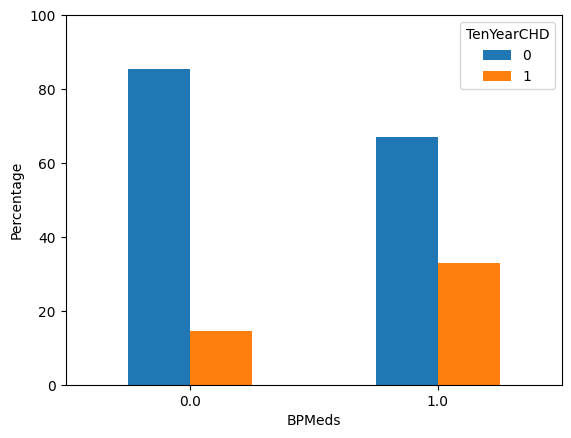

In [184]:
# visualization of the bar graph for percentage wise distribution.

freq_df = data.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to BP medications.

##### 2. What is/are the insight(s) found from the chart?

From the above insights we can see that people who has Blood pressure problems and are already taking medicines for it are prone to CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

If the insight highlights the increased susceptibility of individuals with blood pressure issues who are already on medication, it can lead to positive business opportunities in the healthcare industry and related sectors. Potential impacts could include:

- Increased demand for advanced diagnostic tools, treatments, and medications for managing blood pressure and reducing the risk of CHD in this specific population segment.

Negative Business Impact:

If the insight indicates that individuals with blood pressure problems who are already on medication are more prone to CHD, it may have negative implications for certain businesses or sectors. For example:

- Potential challenges for businesses offering blood pressure medications if the effectiveness in reducing the risk of CHD is not significant enough to motivate individuals to continue using the medications.


#### Chart - 6
# Prevalent Stroke.

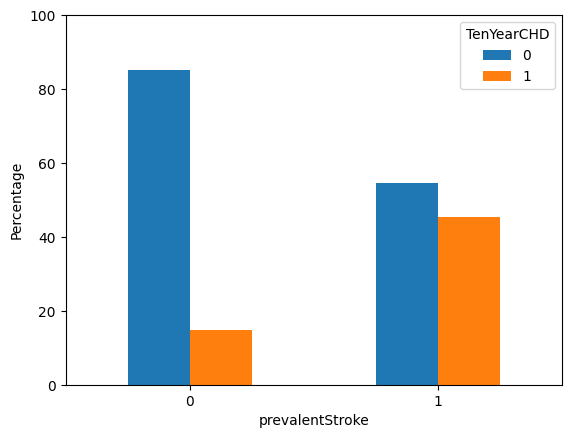

In [185]:
# Chart - 6  visualization of the bar graph for percentage wise distribution.
freq_df = data.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to Prevalent Stroke.

##### 2. What is/are the insight(s) found from the chart?

Higher percentage of patients with prevalent stroke symptoms have a 10-year risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with prevalent strokes so that they can take precautionary measures.

#### Chart - 7
# Diabetes

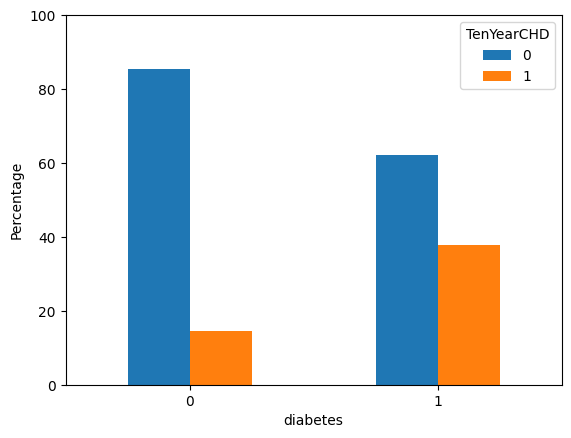

In [186]:
# Chart - 7 visualization of the bar graph for percentage wise distribution.
freq_df = data.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to diabetes.

##### 2. What is/are the insight(s) found from the chart?

Diabetic patients tend to have a higher 10-year risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with diabetes so that they can take precautionary measures.

#### Chart - 8
#Prevalent Hypertension

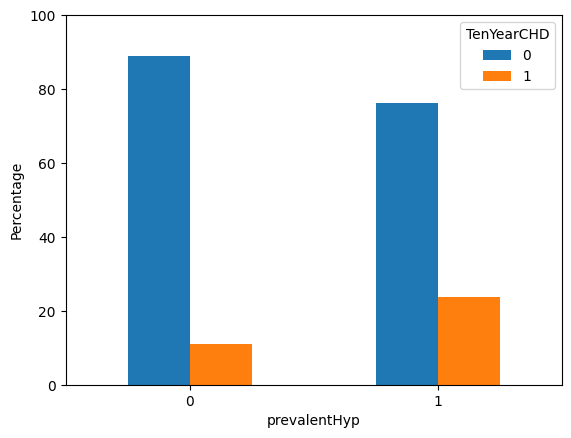

In [187]:
# Chart - 8 visualization of the bar graph for percentage wise distribution.
freq_df = data.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to prevalent hypertension.

##### 2. What is/are the insight(s) found from the chart?

Hypertensive patients are at higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with diabetes so that they can take precautionary measures.

#### Chart - 9
#Continuous data distributions.

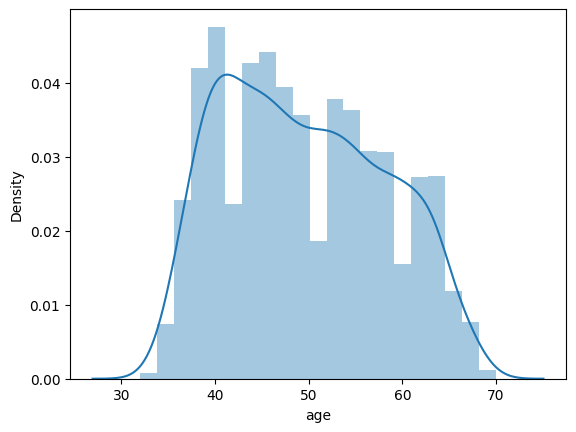

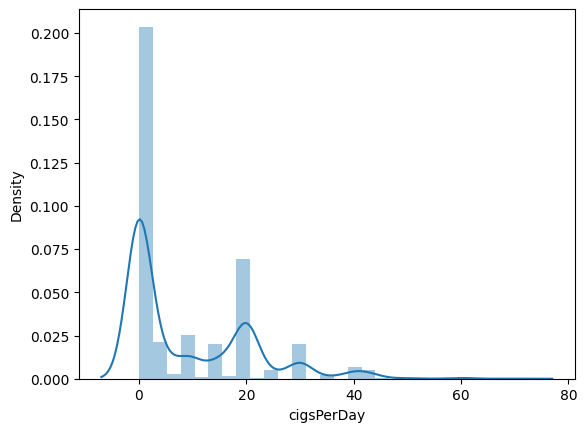

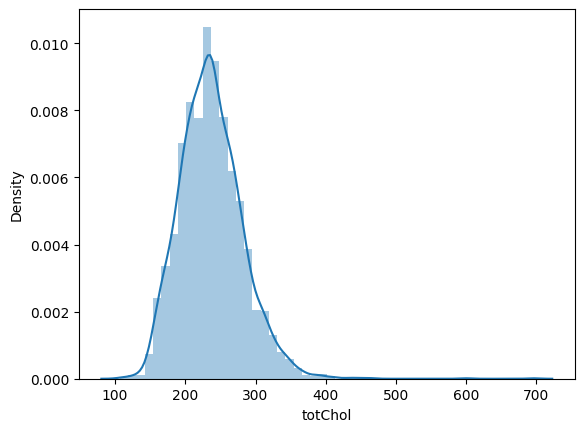

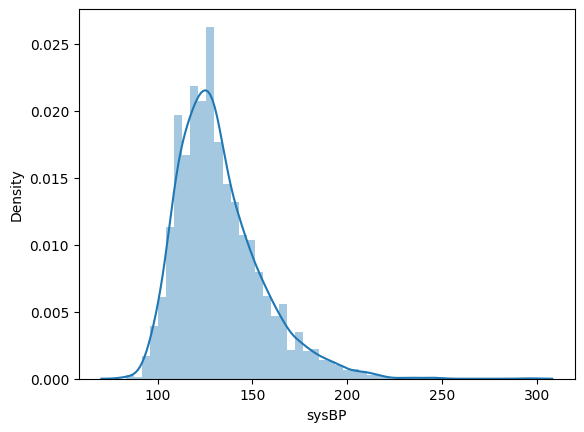

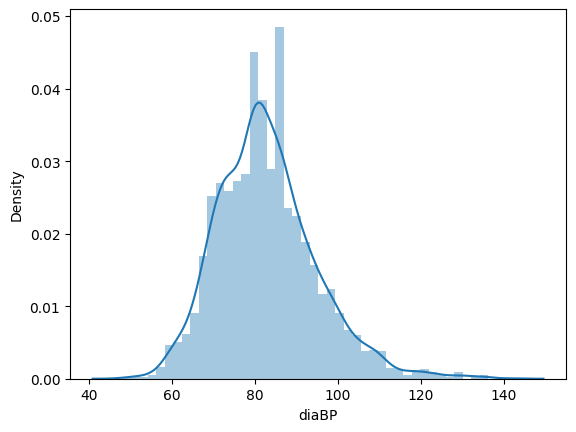

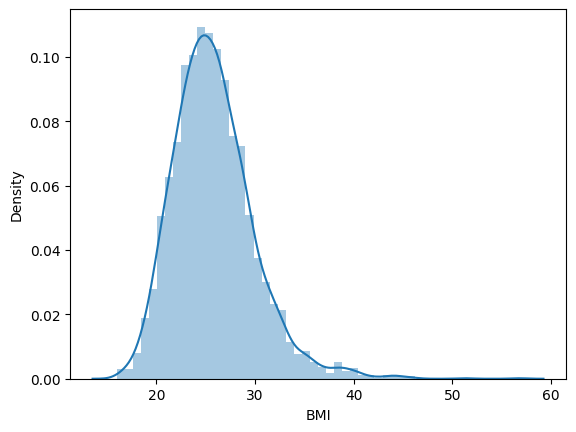

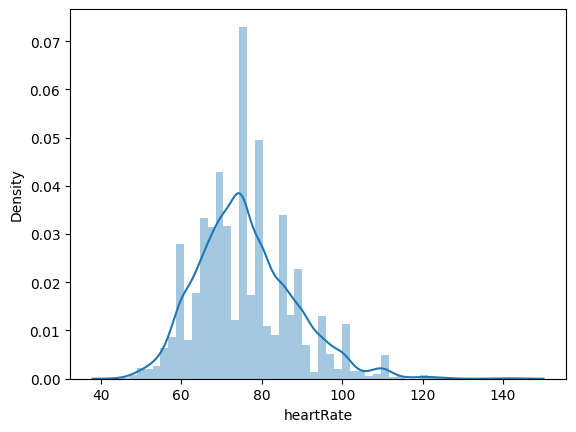

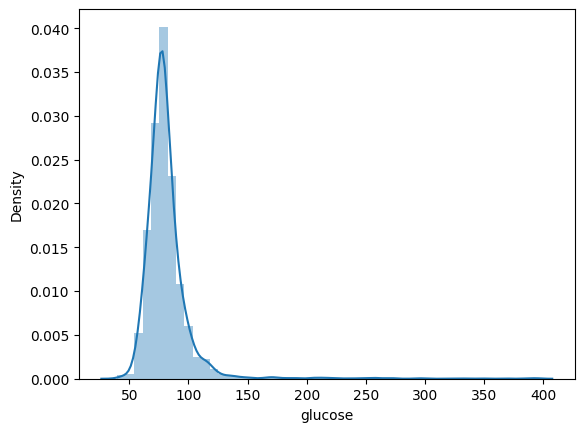

In [188]:
#Chart - 9 visualization distplots for the distribution of continuous data.

for i in continuous:
  if i not in ['TenYearCHD']:
    plt.figure()
    sns.distplot(data[i])

##### 1. Why did you pick the specific chart?

Used distplot to show data distribution.

##### 2. What is/are the insight(s) found from the chart?

Most of the data is skewed need to transform data.

#### Chart - 10
# BMI and Gender

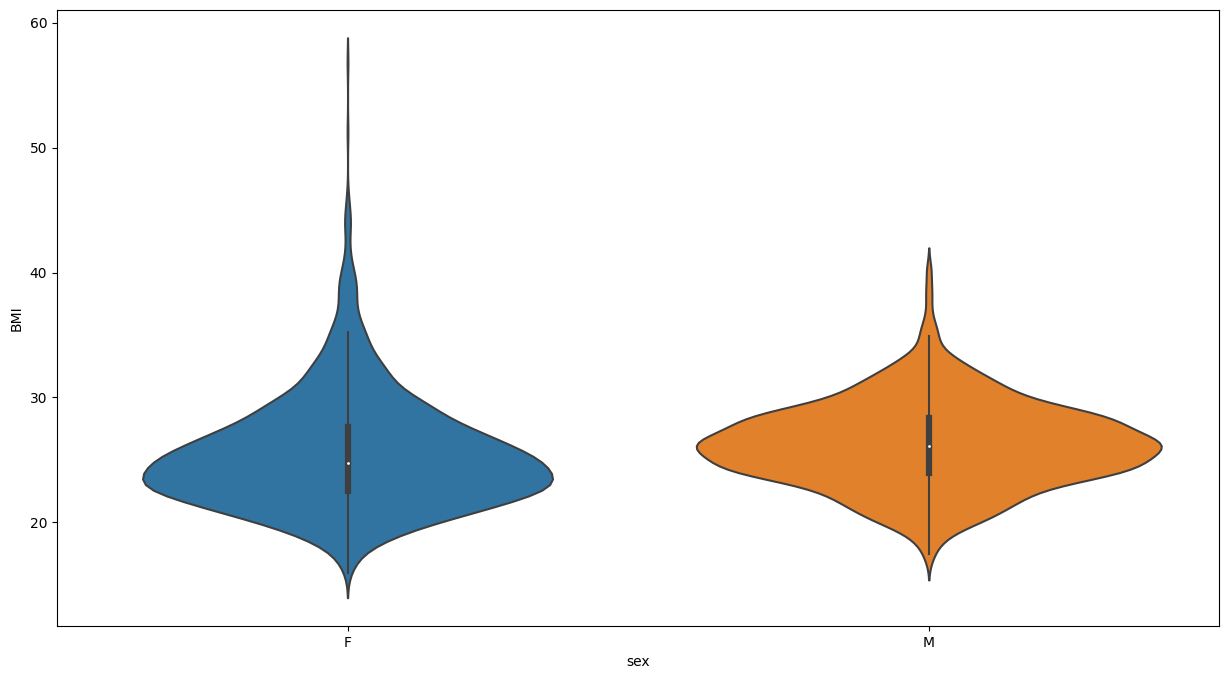

In [189]:
# Chart - 10 visualization code for plotting violin plots
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'BMI', data = data)
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Healthy BMI is considered as a score between 20 - 25. most of the Males lie slightly above 25, and most of the females lie below 25. But the whisker of violin plot in female goes upto 55-60.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest that, on average, males tend to have slightly higher BMI scores than females, with more females falling within the healthy BMI range. The presence of outliers among females with higher BMI scores may indicate a subgroup of individuals who are at a greater risk of weight-related health issues.

#### Chart - 11

#Smoking and Gender

<Figure size 2500x800 with 0 Axes>

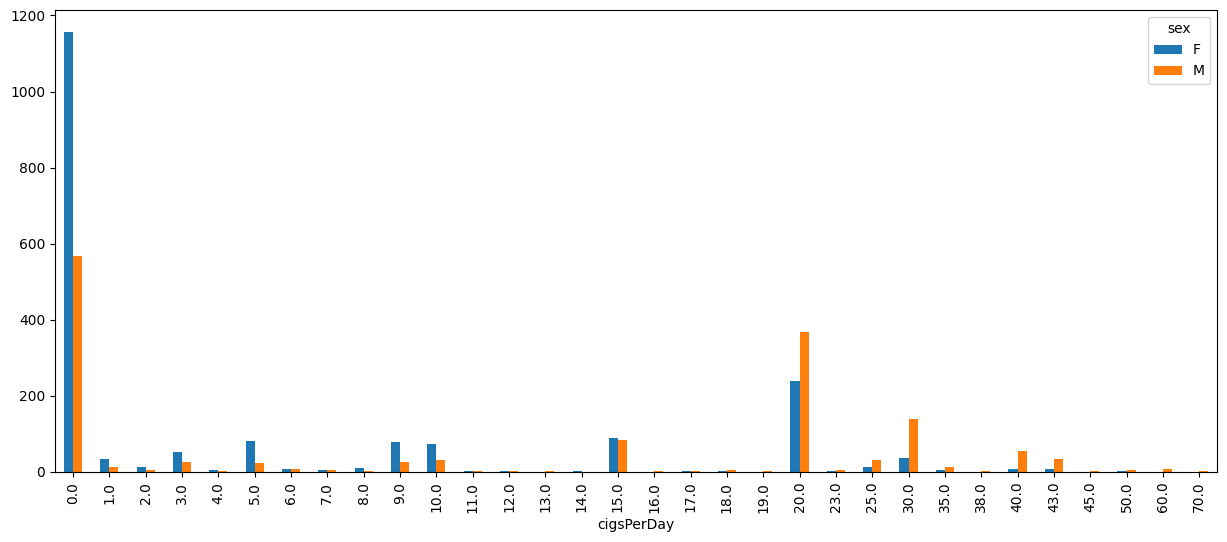

In [190]:
# Chart - 11 visualization code for bar chart.
plt.figure(figsize = (25,8))
data.groupby('sex')['cigsPerDay'].value_counts().unstack(0).plot.bar(figsize = (15,6))
plt.show()


##### 1. Why did you pick the specific chart?`

Used bar chart as I needed to show the comparison of no. of cigarettes per day with respect to gender.

##### 2. What is/are the insight(s) found from the chart?

Majority non-smokers are females, but in some instances like 5,8,9,10 and 15 cigarettes a day females are in lead.

#### Chart - 12
# Systolic Blood Pressure and Gender.

<Axes: xlabel='sex', ylabel='sysBP'>

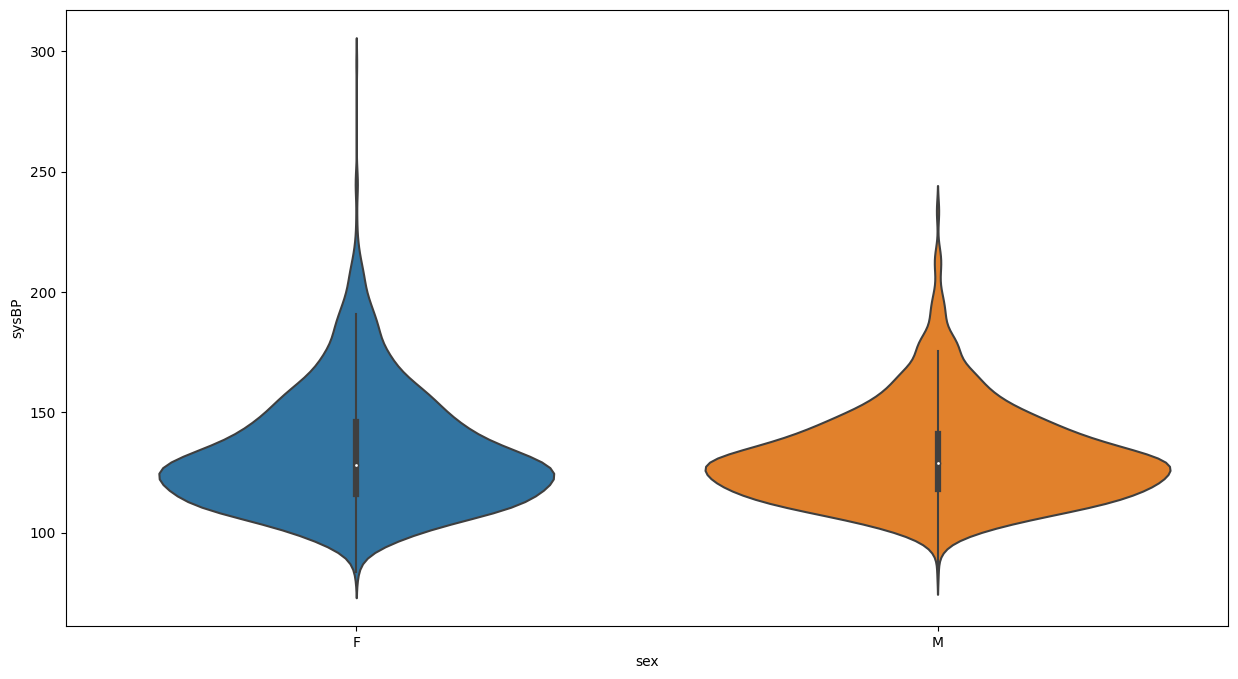

In [191]:
# Chart - 12 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'sysBP', data = data)

##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Females experience higher BP than men in certain instances.

#### Chart - 13
#Diabetes and Glucose.

<Axes: xlabel='diabetes', ylabel='glucose'>

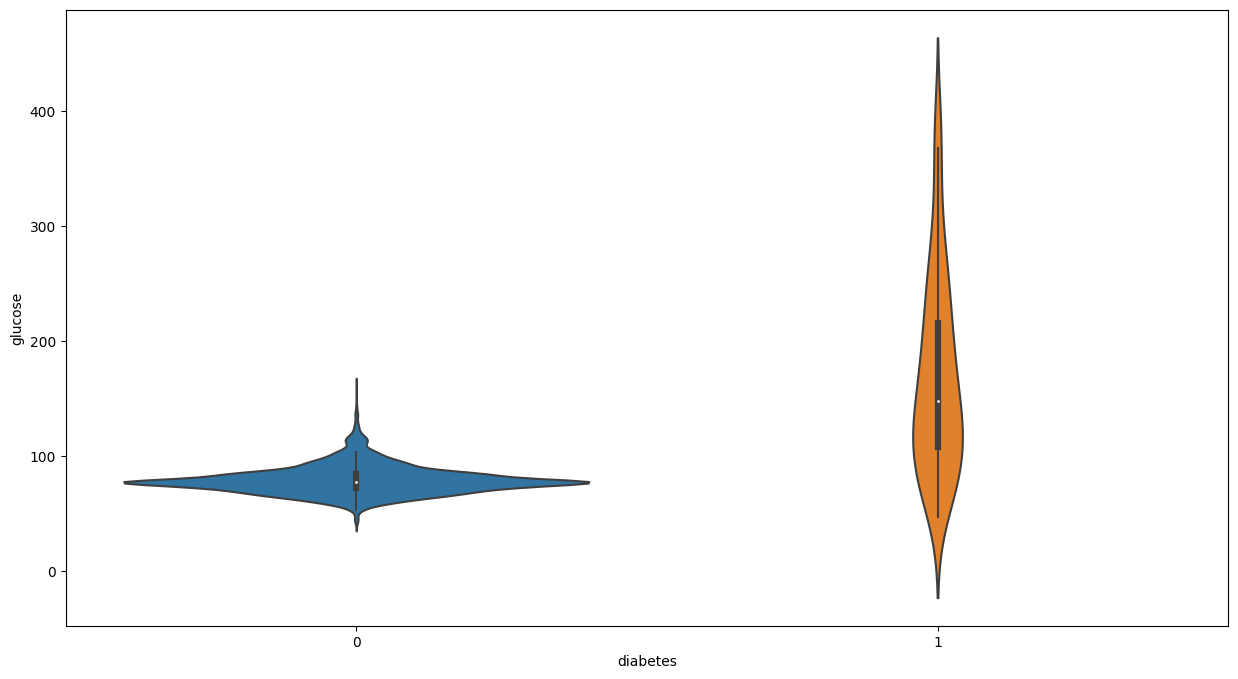

In [192]:
# Chart - 13 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'diabetes', y = 'glucose', data = data)
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Average Blood glucose is 70-100 milligrams per deciliter (mg/dL). We can see majority of non-diabetics in this range, on the other hand the diabetics share  negative values to more than 400 milligrams per deciliter (mg/dL).

#### Chart - 14 - Correlation Heatmap

<Axes: >

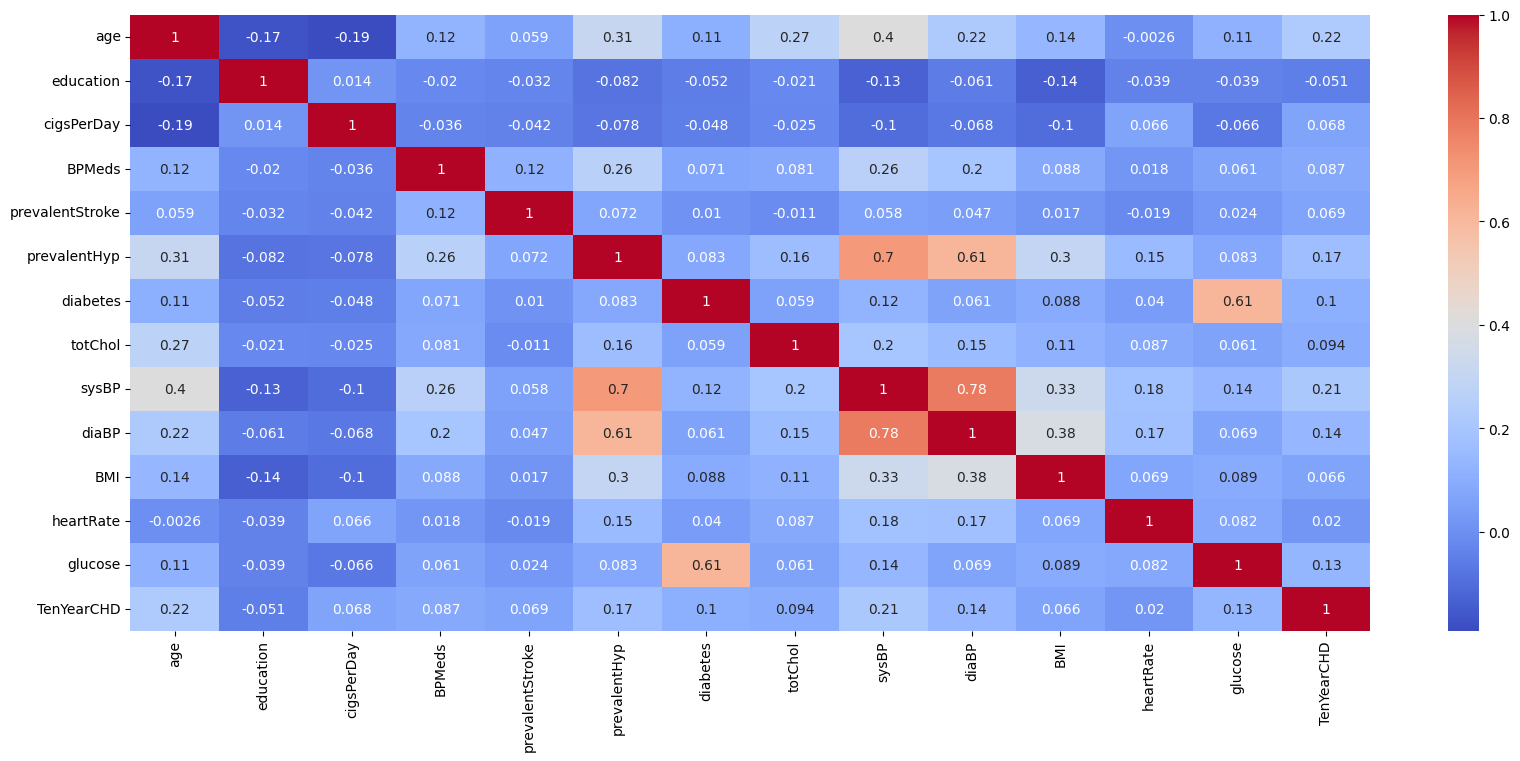

In [193]:
# Correlation Heatmap visualization code

plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

I used correlation heatmap to visualize correlation among features.

##### 2. What is/are the insight(s) found from the chart?

Systolic BP - Diastolic BP, Systolic BP - Prevalent Hypertension and Diastolic BP - Prevalent Hypertension have high correlation.

#### Chart - 15 - Pair Plot 

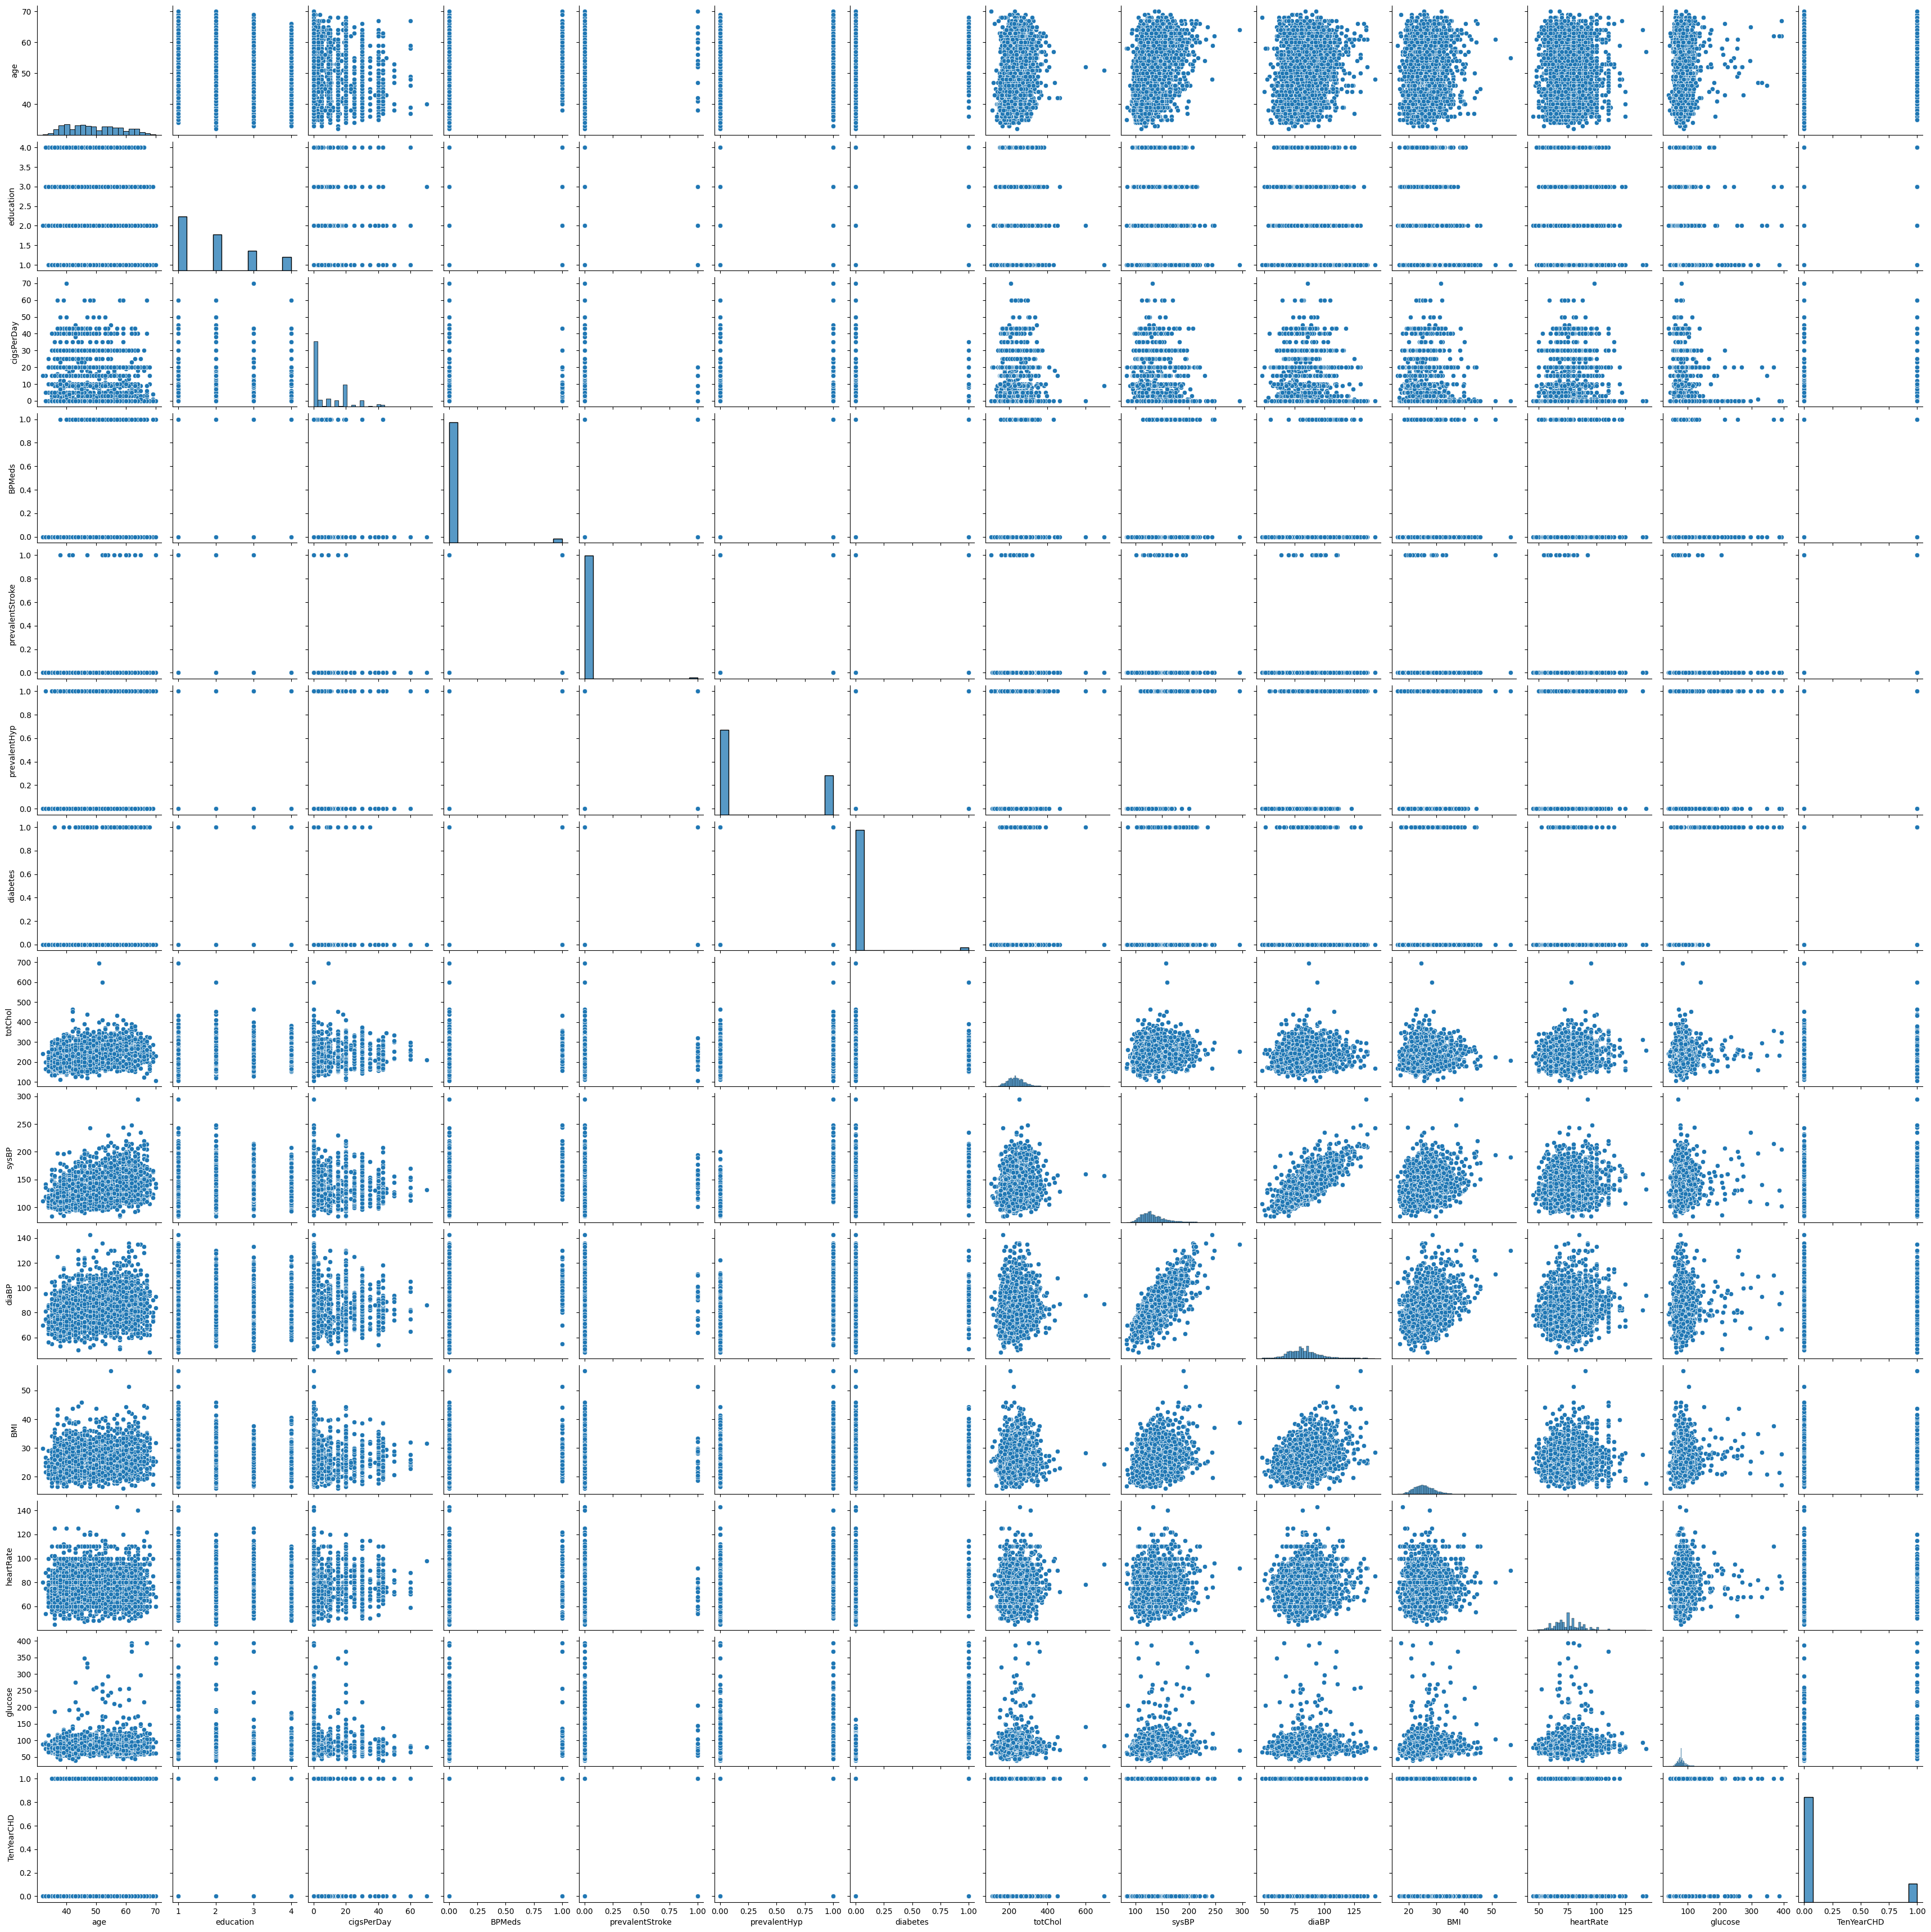

In [194]:
# Pair Plot visualization code

sns.pairplot(data)

##### 1. Why did you pick the specific chart?

Used pairplot for visualizing the relationships between multiple variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Here also we can see Systolic BP - Diastolic BP, Systolic BP - Prevalent Hypertension and Diastolic BP - Prevalent Hypertension have high correlation.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [195]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [196]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [197]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

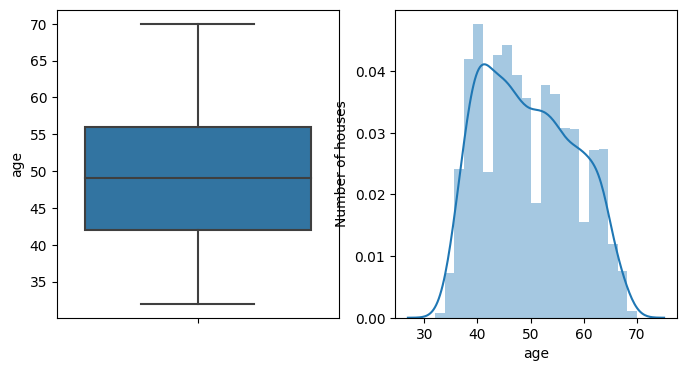

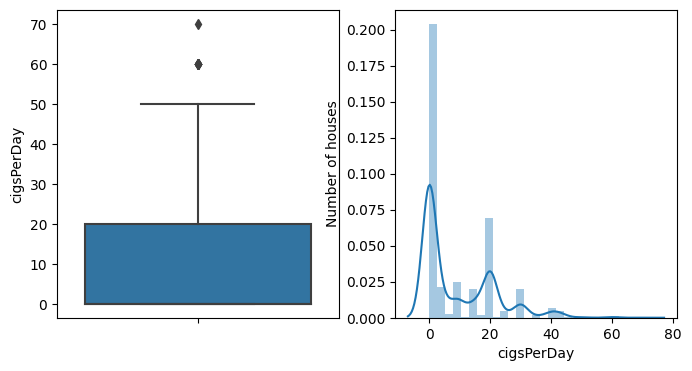

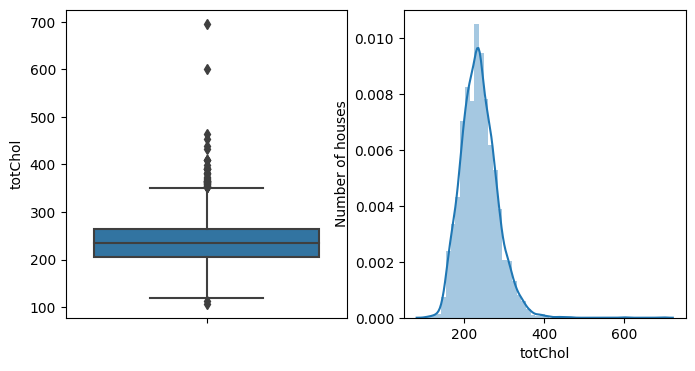

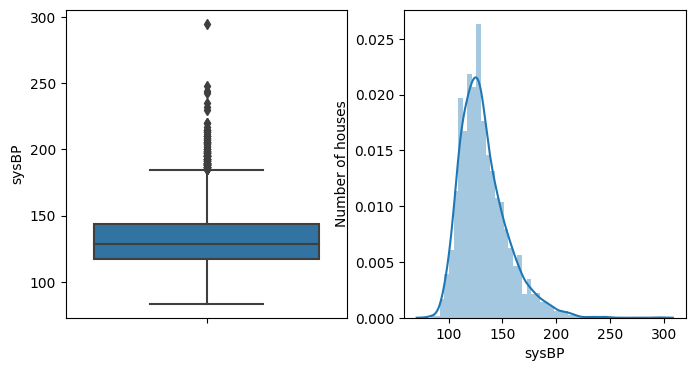

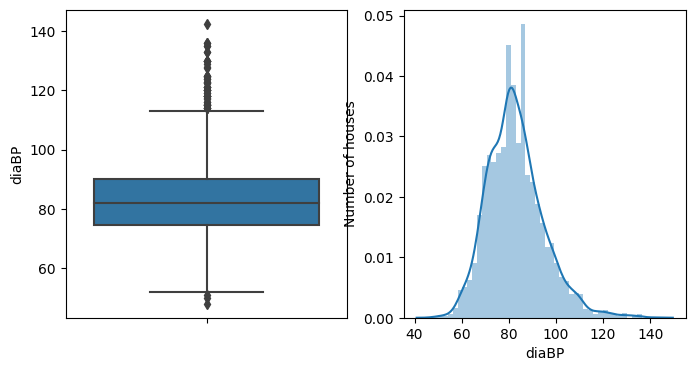

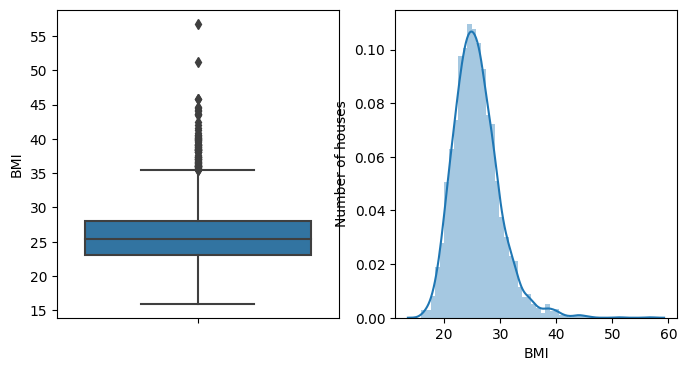

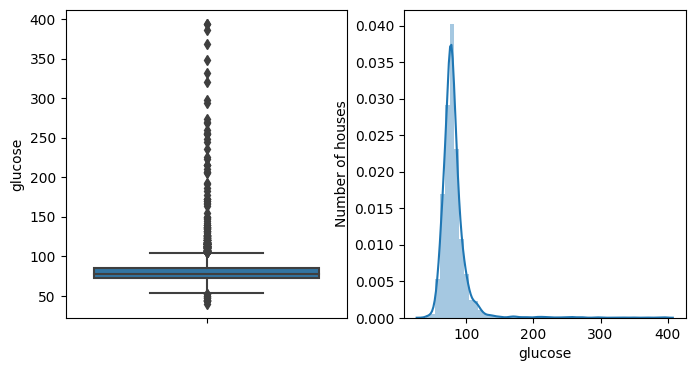

In [198]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [199]:
# Handling Outliers & Outlier treatments

# #Capping the outlier rows with Percentiles
for i in continuous:
  upper_lim = data[i].quantile(.95)
  lower_lim = data[i].quantile(.05)
  data.loc[(data[i] > upper_lim),i] = upper_lim
  data.loc[(data[i] < lower_lim),i] = lower_lim

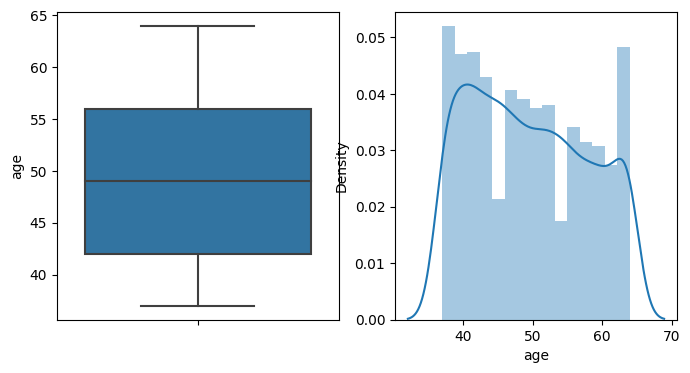

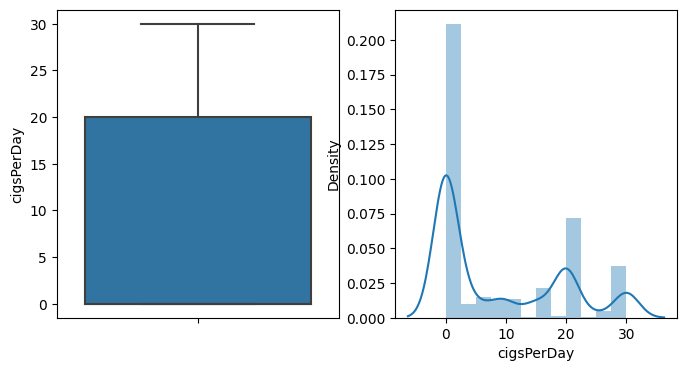

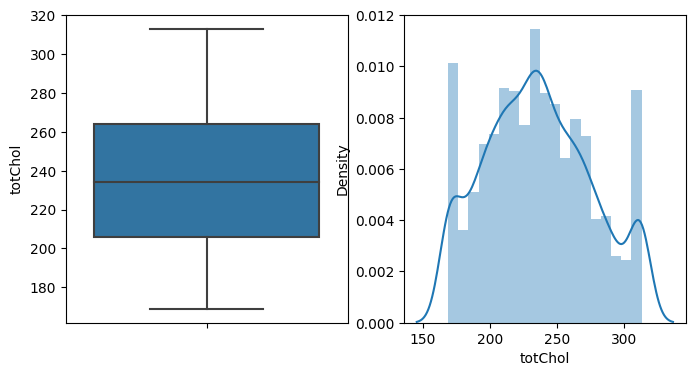

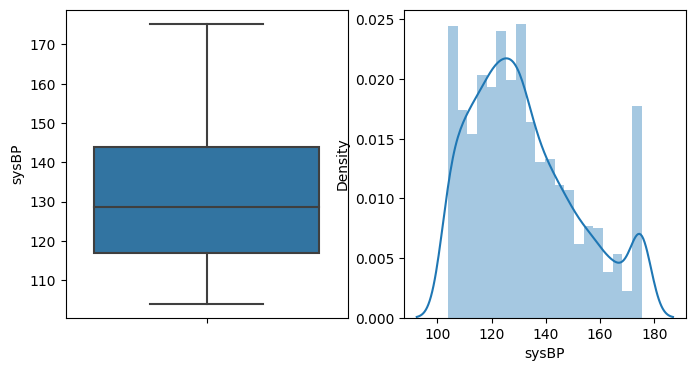

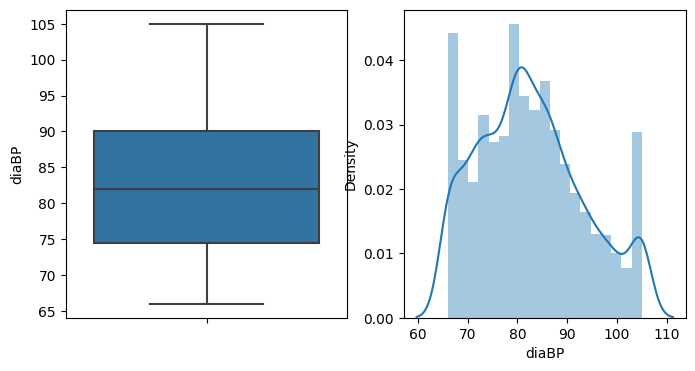

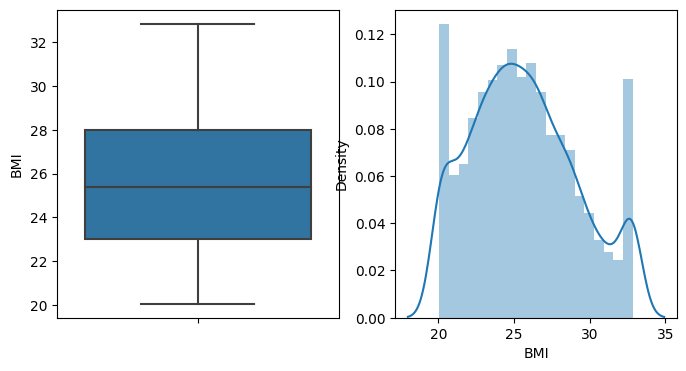

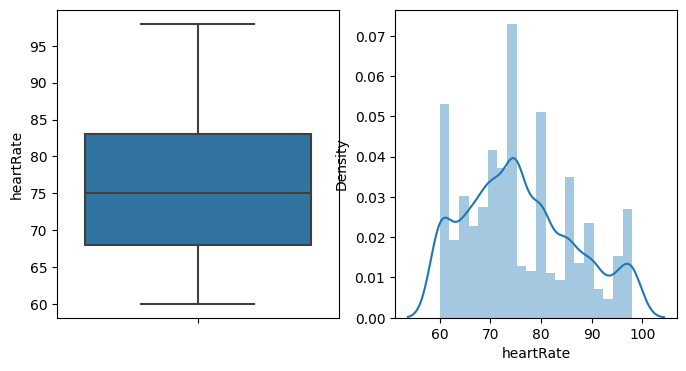

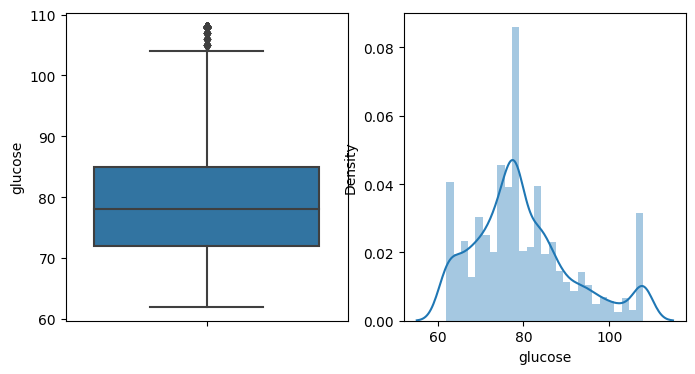

In [200]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [201]:
data.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   37        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [202]:
# Encode your categorical columns

data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [203]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [204]:
# Select your features wisely to avoid overfitting
x = data.drop(columns = ['TenYearCHD'], axis = 1)
y = data['TenYearCHD']


feat_sel = SelectKBest(score_func=chi2, k = 'all')
bestv = feat_sel.fit(x,y)

In [205]:
bsdf = pd.DataFrame({'features':x.columns,'scores': bestv.scores_})
bsdf.sort_values(by = 'scores',ascending = False)

features      scores
10            sysBP  406.372135
0               age  235.378732
9           totChol  193.526116
4        cigsPerDay  182.092635
11            diaBP   78.647981
7      prevalentHyp   64.377708
8          diabetes   35.506306
14          glucose   32.820384
5            BPMeds   25.102438
6   prevalentStroke   15.861998
2               sex   13.778390
12              BMI    7.503628
1         education    4.761842
3        is_smoking    1.985226
13        heartRate    1.695923

In [206]:
features = bsdf.sort_values(by = 'scores',ascending = False)['features'][:12]
features

10              sysBP
0                 age
9             totChol
4          cigsPerDay
11              diaBP
7        prevalentHyp
8            diabetes
14            glucose
5              BPMeds
6     prevalentStroke
2                 sex
12                BMI
Name: features, dtype: object

In [207]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [208]:
# Checking VIF for each variable

independent_variables = [i for i in data.columns if i not in ['TenYearCHD']]
calc_vif(data[independent_variables])

variables         VIF
0             sysBP  177.412662
1             diaBP  167.199912
2               BMI   61.597415
3         heartRate   50.724797
4           glucose   47.147752
5               age   47.101645
6           totChol   40.338650
7        is_smoking    5.838418
8        cigsPerDay    5.184057
9         education    4.657434
10     prevalentHyp    2.571503
11              sex    2.160796
12           BPMeds    1.130782
13         diabetes    1.112065
14  prevalentStroke    1.026454

In [209]:
independent_variables = [i for i in data.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(data[independent_variables])


variables       VIF
0              age  5.442645
1        education  3.995999
2              sex  1.976329
3       cigsPerDay  1.805761
4     prevalentHyp  1.685179
5           BPMeds  1.120342
6         diabetes  1.044625
7  prevalentStroke  1.024795

In [210]:
x = data.drop(columns = ['TenYearCHD','sysBP','diaBP','glucose','BMI','totChol','heartRate','is_smoking'], axis = 1)
y = data['TenYearCHD']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [211]:
# Transform Your data
x = np.log(x+1)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [212]:
# for var in continuous:
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     fig = sns.boxplot(y=data[var])
#     fig.set_title('')
#     fig.set_ylabel(var)
    
#     plt.subplot(1, 2, 2)
#     fig = sns.distplot(data[var].dropna())
#     fig.set_xlabel(var)

#     plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [213]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [214]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20 , random_state= 0, stratify = y)


### 6. Data Scaling

In [215]:
# Scaling your data
mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)


##### What data splitting ratio have you used and why? 

Answer Here.

##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [216]:
# Handling Imbalanced Dataset (If needed)

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
x_train, y_train = smote.fit_resample(x_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [217]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

### ML Model - 1


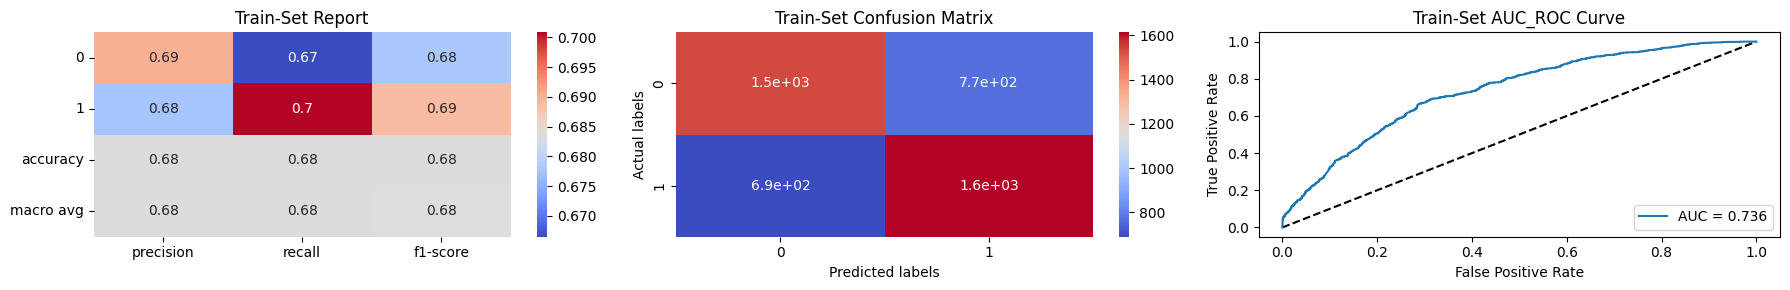

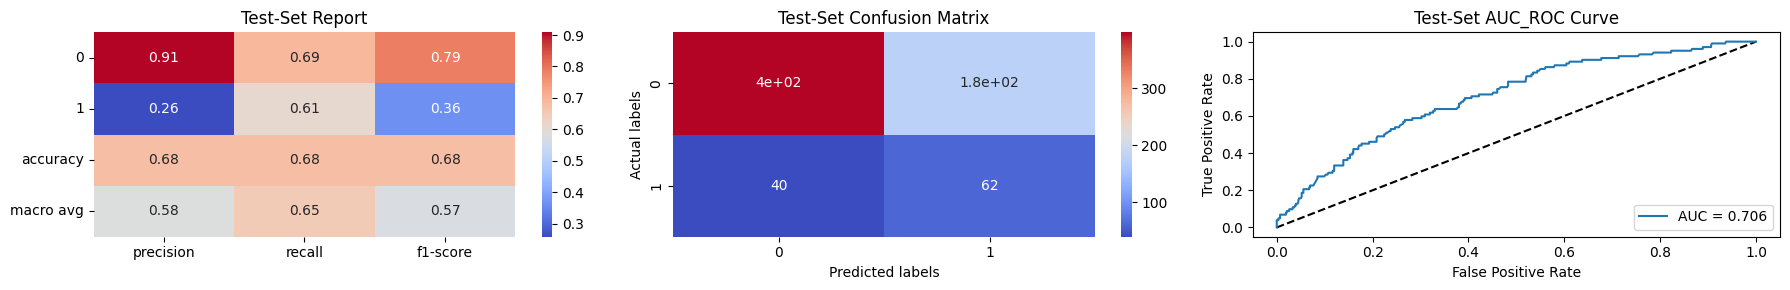

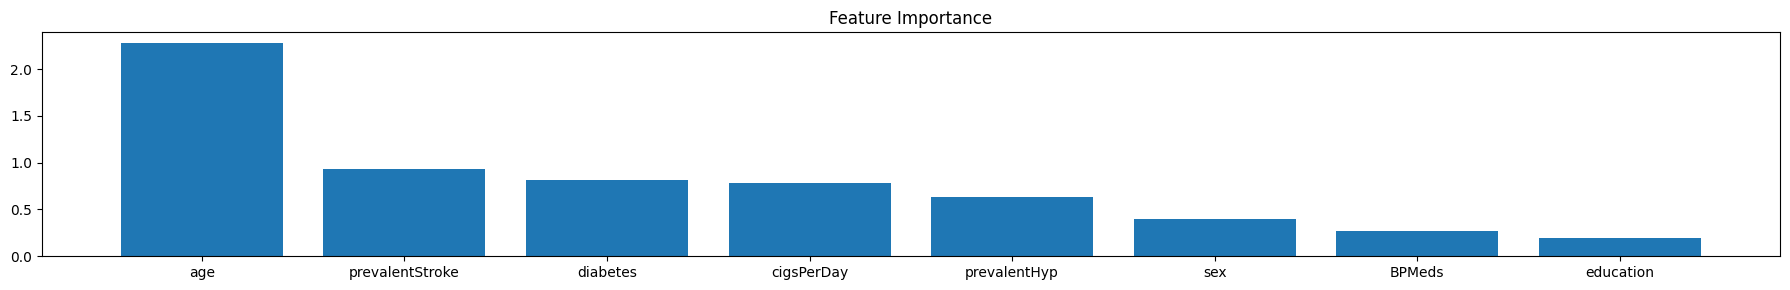

LogisticRegression(max_iter=10000)

In [218]:
# Fitting Logistic Regression Model

lr = LogisticRegression(fit_intercept=True, max_iter=10000)

analyse_model(lr, x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [219]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [220]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gslr = LogisticRegression()

params = {'C': [1,10,20,30,40,50]}

# Fit the Algorithm
bestlr = GridSearchCV(gslr, param_grid= params, scoring= 'accuracy', cv = 5)

bestlr.fit(x_train, y_train)
# Predict on the model

bestlr.best_params_

{'C': 10}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2
# **Decision Tree**

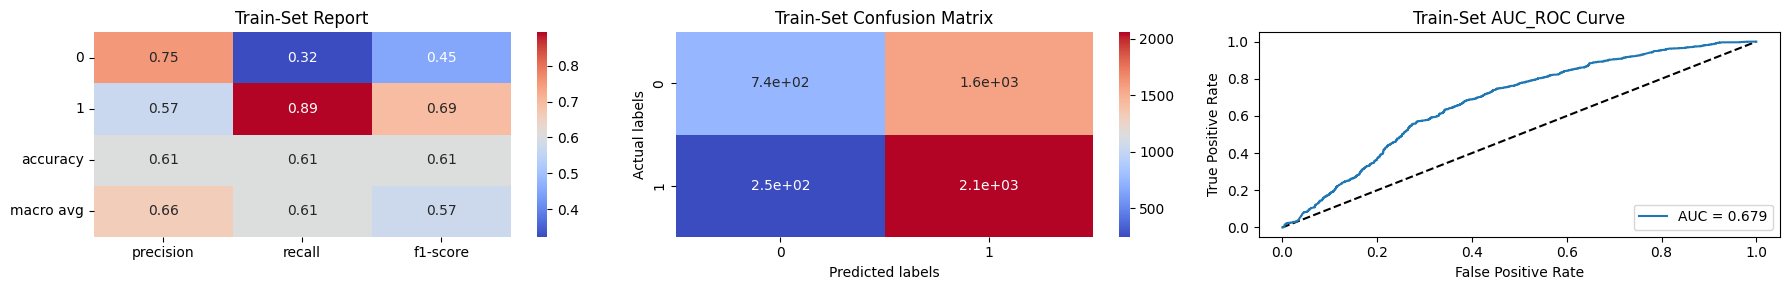

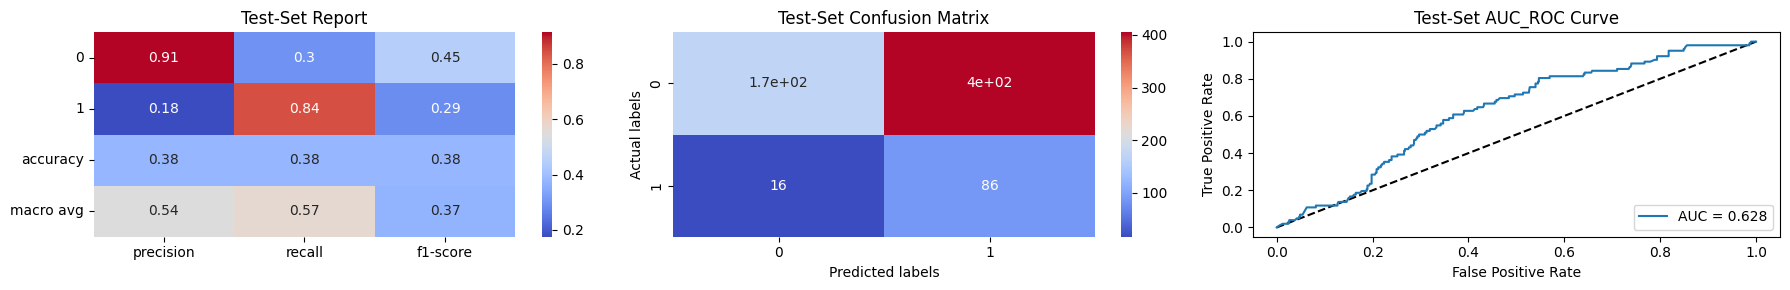

<Figure size 1800x300 with 0 Axes>

SVC(C=0.1, max_iter=1000, probability=True, random_state=0)

In [221]:
# SVM algorithm
clf = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}


# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, cv=5)
svc.fit(x_train, y_train)

# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [222]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [223]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

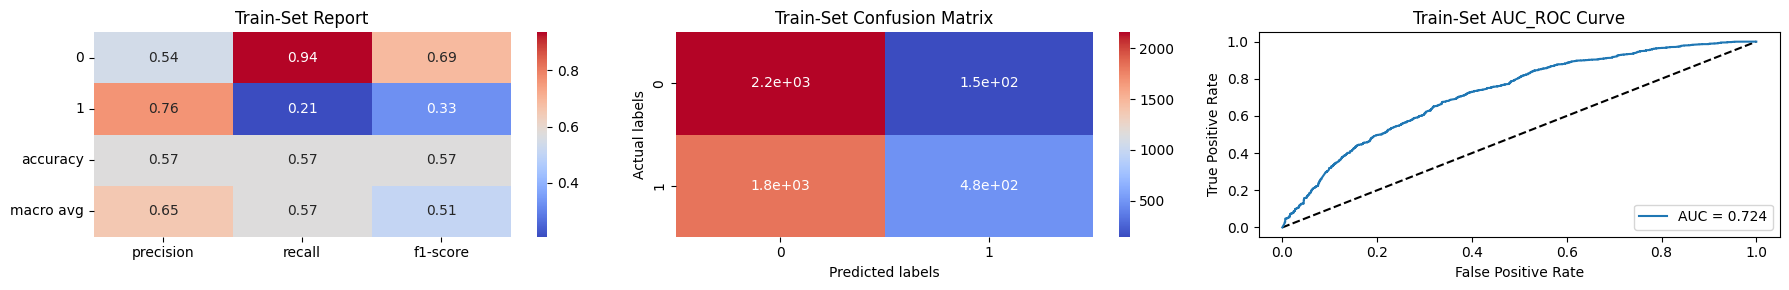

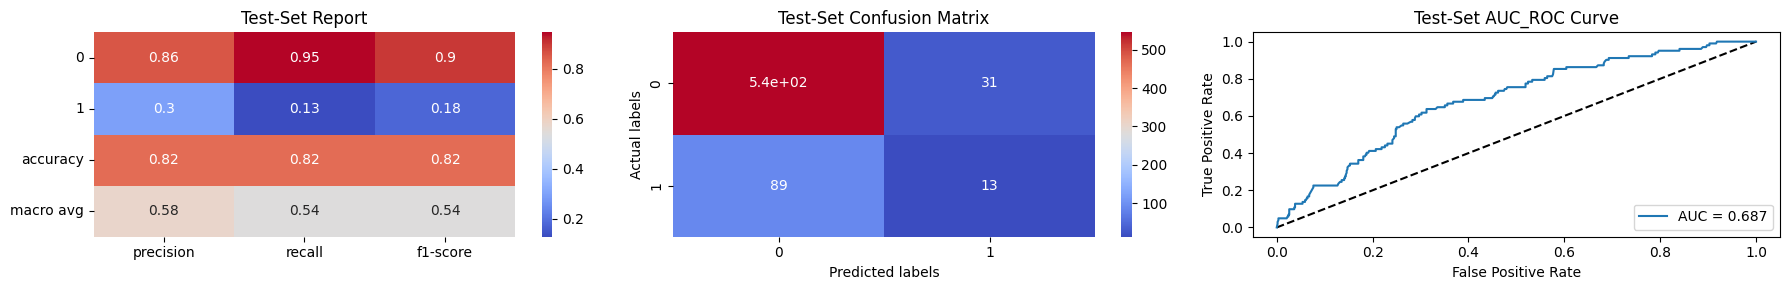

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [224]:
# ML Model - 3 Implementation

# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [225]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [226]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

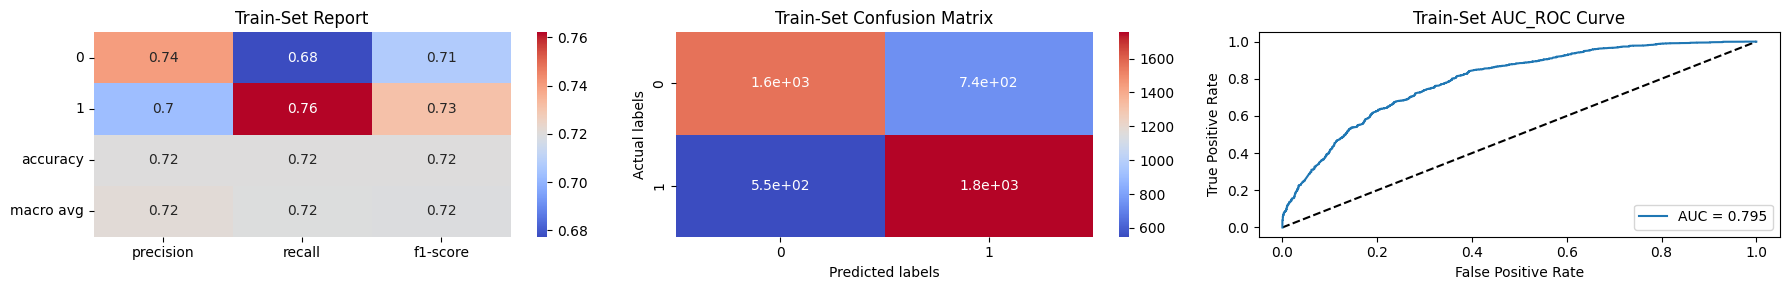

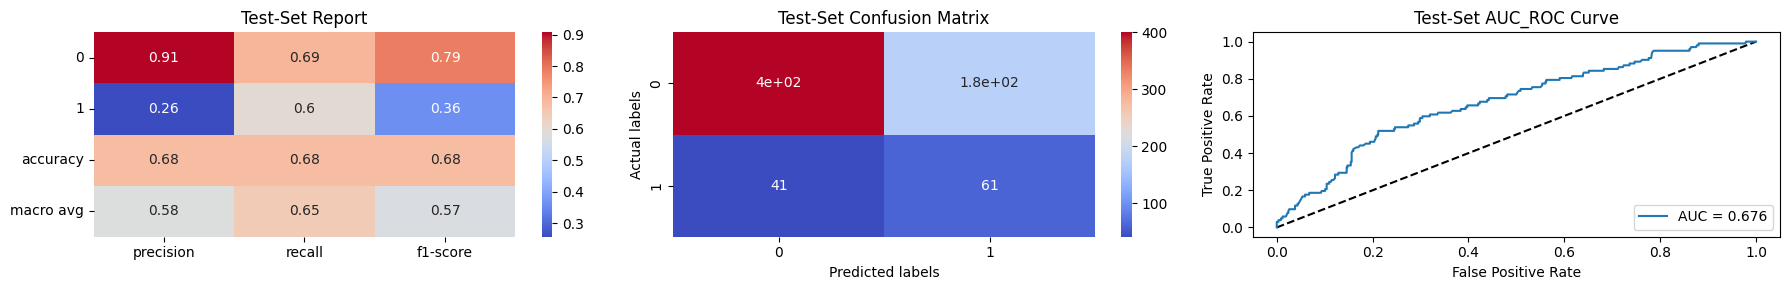

<Figure size 1800x300 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [46, 60],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 150]})

In [227]:
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, cv=5)
rf.fit(x_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf, x_train, x_test, y_train, y_test)

[19:05:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

[19:05:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.



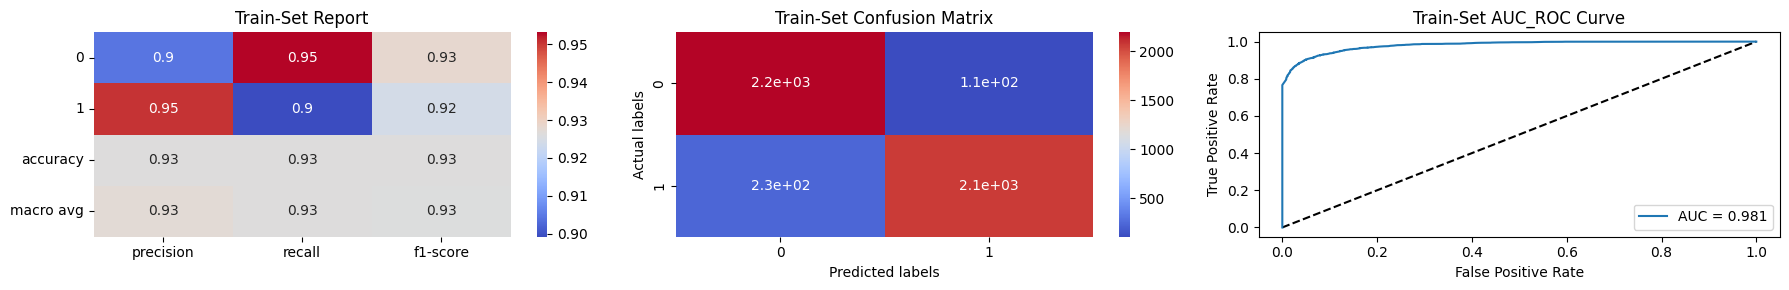

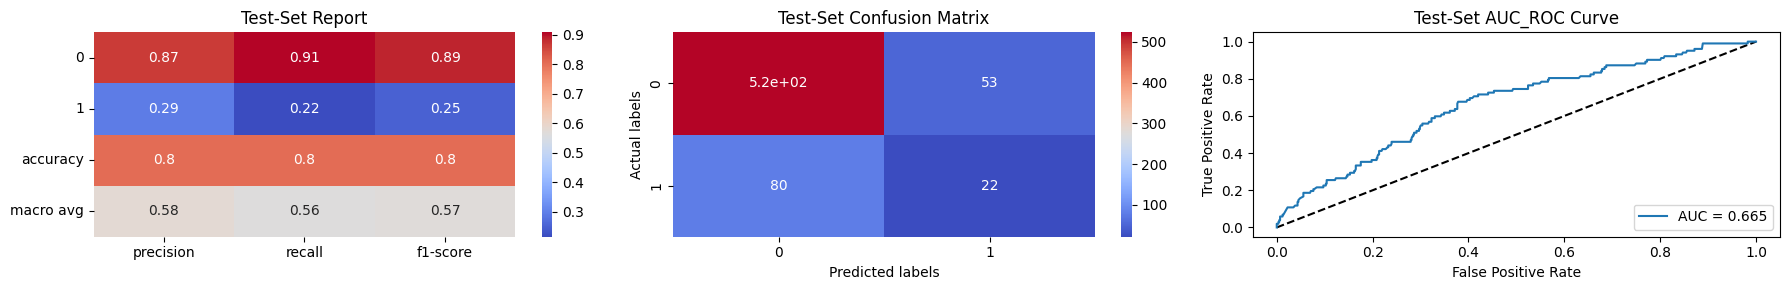

<Figure size 1800x300 with 0 Axes>

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=3, ...),
             param_grid={'eta': [0.05, 0.08, 0.1], 'max_depth': [8, 10],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [150]},
             scoring='accuracy')

In [228]:
# Classifier
clf = XGBClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf,scoring = 'accuracy', param_grid = grid, cv=5)
xgb.fit(x_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb, x_train, x_test, y_train, y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [229]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [230]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***